In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
IMG_SIZE=128
path_train='/content/drive/MyDrive/dataset3/images/train'
path_val='/content/drive/MyDrive/dataset3/images/validation'
x_train=[]
y_train=[]
x_val=[]
y_val=[]


In [ ]:
category={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5, 'surprise':6}
for i in sorted(os.listdir(path_train)):

    path=os.path.join(path_train,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_train.append(img)
        y_train.append(category[i]) 
        
print('Number of Training images:',len(x_train))
print('Number of Labels for training images:',len(y_train))

for i in sorted(os.listdir(path_val)):
    
    path=os.path.join(path_val,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_val.append(img)
        y_val.append(category[i]) 
        
print('Number of Validation images:',len(x_val))

print('Number of Labels for validation images:',len(y_val))

Number of Training images: 58454
Number of Labels for training images: 58454
Number of Validation images: 7066
Number of Labels for validation images: 7066


In [ ]:
x_train= np.array(x_train, dtype="float") / 255.0
x_val= np.array(x_val, dtype="float") / 255.0

y_train= np.array(y_train)
y_val=np.array(y_val)

y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)


In [ ]:
x_train_reshaped=x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1)
x_val_reshaped=x_val.reshape(x_val.shape[0],IMG_SIZE,IMG_SIZE,1)
print(x_train_reshaped.shape)
print(x_val_reshaped.shape)

(58454, 128, 128, 1)
(7066, 128, 128, 1)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))),
model.add(keras.layers.Dropout(0.25)),
    
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))),
model.add(keras.layers.Dropout(0.25)),

model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))),
model.add(keras.layers.Dropout(0.25)),

model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))),
model.add(keras.layers.Dropout(0.25)),

model.add(keras.layers.Flatten()),
model.add(keras.layers.Dense(512, activation='relu')),
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Dropout(0.5)),
model.add(keras.layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                        

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(x_train_reshaped,
                        y_train,
                        batch_size=64,
                        epochs=30,
                        validation_data=(x_val_reshaped,y_val),
                        shuffle=True, 
                        callbacks=[callback])

Epoch 1/30
914/914 [==============================] - 65s 53ms/step - loss: 1.7380 - accuracy: 0.3790 - val_loss: 1.5602 - val_accuracy: 0.4154
Epoch 2/30
914/914 [==============================] - 47s 51ms/step - loss: 1.2218 - accuracy: 0.5367 - val_loss: 1.1434 - val_accuracy: 0.5675
Epoch 3/30
914/914 [==============================] - 47s 52ms/step - loss: 1.0599 - accuracy: 0.6023 - val_loss: 0.9966 - val_accuracy: 0.6343
Epoch 4/30
914/914 [==============================] - 47s 52ms/step - loss: 0.9357 - accuracy: 0.6528 - val_loss: 0.9327 - val_accuracy: 0.6605
Epoch 5/30
914/914 [==============================] - 47s 52ms/step - loss: 0.8290 - accuracy: 0.6959 - val_loss: 0.9927 - val_accuracy: 0.6405
Epoch 6/30
914/914 [==============================] - 47s 52ms/step - loss: 0.7167 - accuracy: 0.7373 - val_loss: 0.7766 - val_accuracy: 0.7263
Epoch 7/30
914/914 [==============================] - 47s 52ms/step - loss: 0.5713 - accuracy: 0.7953 - val_loss: 0.6008 - val_accuracy:

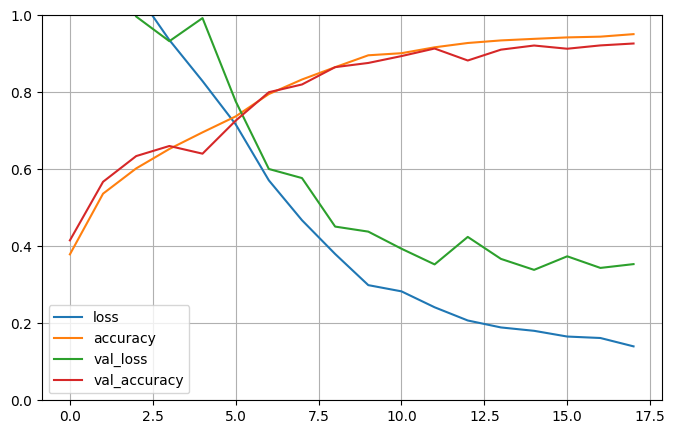

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("duygumodel_mobile.h5")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
modelpath = '/content/drive/MyDrive/duygumodel_mobile.h5'
model = keras.models.load_model(modelpath)
IMG_SIZE=128
x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_val_rgb = np.repeat(x_val_reshaped, 3, axis=-1)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_rgb, y_train, batch_size=64, epochs=60, validation_data=(x_val_rgb, y_val), shuffle=True, callbacks=[callback])



Epoch 1/60
914/914 [==============================] - 26s 16ms/step - loss: 1.4519 - accuracy: 0.4419 - val_loss: 1.3529 - val_accuracy: 0.4907
Epoch 2/60
914/914 [==============================] - 12s 13ms/step - loss: 1.2953 - accuracy: 0.5022 - val_loss: 1.2456 - val_accuracy: 0.5232
Epoch 3/60
914/914 [==============================] - 11s 12ms/step - loss: 1.2127 - accuracy: 0.5378 - val_loss: 1.1846 - val_accuracy: 0.5531
Epoch 4/60
914/914 [==============================] - 11s 12ms/step - loss: 1.1342 - accuracy: 0.5696 - val_loss: 1.1408 - val_accuracy: 0.5681
Epoch 5/60
914/914 [==============================] - 11s 12ms/step - loss: 1.0557 - accuracy: 0.6019 - val_loss: 1.1496 - val_accuracy: 0.5684
Epoch 6/60
914/914 [==============================] - 11s 12ms/step - loss: 0.9870 - accuracy: 0.6278 - val_loss: 1.0495 - val_accuracy: 0.6165
Epoch 7/60
914/914 [==============================] - 11s 12ms/step - loss: 0.9129 - accuracy: 0.6562 - val_loss: 1.0003 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

modelpath = '/content/drive/MyDrive/duygumodel_mobile.h5'
model = keras.models.load_model(modelpath)

IMG_SIZE = 128
x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_val_rgb = np.repeat(x_val_reshaped, 3, axis=-1)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_rgb, y_train, batch_size=64, epochs=60, validation_data=(x_val_rgb, y_val), shuffle=True, callbacks=[callback])


58889256/58889256 [==============================] - 5s 0us/step
Epoch 1/60
914/914 [==============================] - 23s 23ms/step - loss: 1.5232 - accuracy: 0.4103 - val_loss: 1.4319 - val_accuracy: 0.4505
Epoch 2/60
914/914 [==============================] - 18s 19ms/step - loss: 1.4114 - accuracy: 0.4578 - val_loss: 1.3879 - val_accuracy: 0.4638
Epoch 3/60
914/914 [==============================] - 18s 19ms/step - loss: 1.3693 - accuracy: 0.4740 - val_loss: 1.3526 - val_accuracy: 0.4900
Epoch 4/60
914/914 [==============================] - 18s 19ms/step - loss: 1.3349 - accuracy: 0.4870 - val_loss: 1.3444 - val_accuracy: 0.4935
Epoch 5/60
914/914 [==============================] - 18s 19ms/step - loss: 1.3033 - accuracy: 0.5031 - val_loss: 1.2950 - val_accuracy: 0.5129
Epoch 6/60
914/914 [==============================] - 18s 19ms/step - loss: 1.2731 - accuracy: 0.5162 - val_loss: 1.2606 - val_accuracy: 0.5307
Epoch 7/60
914/914 [==============================] - 18s 19ms/step - l

In [ ]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-fktt1bu1
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-fktt1bu1
  Resolved https://github.com/rcmalli/keras-squeezenet.git to commit 4fb9cb7510ea0315303090edbc1bd97c2916af81
  Preparing metadata (setup.py) ... done
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-py3-none-any.whl size=4434 sha256=46adf5a009a745ce43e576ec6aea249dbe1767440d8d458e0c9fd78f46e8e3ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-o9tvssaf/wheels/54/7b/2a/40b1d7284f73e62adae67b42e4f2eb34ecc4e7ca3ae88341f9
Successfully built keras-squeezenet


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

modelpath = '/content/drive/MyDrive/duygumodel_mobile.h5'
model = keras.models.load_model(modelpath)

IMG_SIZE = 128
x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_val_rgb = np.repeat(x_val_reshaped, 3, axis=-1)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_rgb, y_train, batch_size=64, epochs=100, validation_data=(x_val_rgb, y_val), shuffle=True, callbacks=[callback])


87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/100
914/914 [==============================] - 25s 20ms/step - loss: 1.6061 - accuracy: 0.3800 - val_loss: 1.4533 - val_accuracy: 0.4432
Epoch 2/100
914/914 [==============================] - 14s 16ms/step - loss: 1.4655 - accuracy: 0.4352 - val_loss: 1.4233 - val_accuracy: 0.4498
Epoch 3/100
914/914 [==============================] - 14s 16ms/step - loss: 1.4071 - accuracy: 0.4596 - val_loss: 1.3745 - val_accuracy: 0.4772
Epoch 4/100
914/914 [==============================] - 14s 16ms/step - loss: 1.3619 - accuracy: 0.4780 - val_loss: 1.3566 - val_accuracy: 0.4805
Epoch 5/100
914/914 [==============================] - 15s 16ms/step - loss: 1.3203 - accuracy: 0.4919 - val_loss: 1.3314 - val_accuracy: 0.4938
Epoch 6/100
914/914 [==============================] - 15s 16ms/step - loss: 1.2861 - accuracy: 0.5087 - val_loss: 1.2966 - val_accuracy: 0.5058
Epoch 7/100
914/914 [==============================] - 15s 16ms/s

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

modelpath = '/content/drive/MyDrive/duygumodel_mobile.h5'
model = keras.models.load_model(modelpath)

IMG_SIZE = 128
x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_val_rgb = np.repeat(x_val_reshaped, 3, axis=-1)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_rgb, y_train, batch_size=64, epochs=100, validation_data=(x_val_rgb, y_val), shuffle=True, callbacks=[callback])


29084464/29084464 [==============================] - 1s 0us/step
Epoch 1/100
914/914 [==============================] - 39s 27ms/step - loss: 1.4559 - accuracy: 0.4454 - val_loss: 1.3348 - val_accuracy: 0.4975
Epoch 2/100
914/914 [==============================] - 20s 22ms/step - loss: 1.3132 - accuracy: 0.4974 - val_loss: 1.2891 - val_accuracy: 0.5112
Epoch 3/100
914/914 [==============================] - 20s 22ms/step - loss: 1.2451 - accuracy: 0.5233 - val_loss: 1.2298 - val_accuracy: 0.5259
Epoch 4/100
914/914 [==============================] - 20s 22ms/step - loss: 1.1822 - accuracy: 0.5499 - val_loss: 1.1938 - val_accuracy: 0.5562
Epoch 5/100
914/914 [==============================] - 20s 22ms/step - loss: 1.1261 - accuracy: 0.5729 - val_loss: 1.1319 - val_accuracy: 0.5761
Epoch 6/100
914/914 [==============================] - 20s 22ms/step - loss: 1.0690 - accuracy: 0.5955 - val_loss: 1.1176 - val_accuracy: 0.5836
Epoch 7/100
914/914 [==============================] - 20s 22ms/s

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

modelpath = '/content/drive/MyDrive/duygumodel_mobile.h5'
model = keras.models.load_model(modelpath)

IMG_SIZE = 128
x_train_rgb = np.repeat(x_train_reshaped, 3, axis=-1)
x_val_rgb = np.repeat(x_val_reshaped, 3, axis=-1)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_rgb, y_train, batch_size=64, epochs=100, validation_data=(x_val_rgb, y_val), shuffle=True, callbacks=[callback])


16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/100
914/914 [==============================] - 27s 21ms/step - loss: 1.8263 - accuracy: 0.2459 - val_loss: 1.8145 - val_accuracy: 0.2583
Epoch 2/100
914/914 [==============================] - 16s 17ms/step - loss: 1.8174 - accuracy: 0.2492 - val_loss: 1.8101 - val_accuracy: 0.2583
Epoch 3/100
914/914 [==============================] - 16s 17ms/step - loss: 1.8167 - accuracy: 0.2495 - val_loss: 1.8093 - val_accuracy: 0.2583
Epoch 4/100
914/914 [==============================] - 15s 17ms/step - loss: 1.8166 - accuracy: 0.2495 - val_loss: 1.8093 - val_accuracy: 0.2583
Epoch 5/100
914/914 [==============================] - 15s 17ms/step - loss: 1.8168 - accuracy: 0.2495 - val_loss: 1.8092 - val_accuracy: 0.2583
Epoch 6/100
914/914 [==============================] - 15s 17ms/step - loss: 1.8167 - accuracy: 0.2495 - val_loss: 1.8102 - val_accuracy: 0.2583
Epoch 7/100
914/914 [==============================] - 15s 17ms/s